# Restricted Boltzmann Machines



Reference - https://github.com/odie2630463/Restricted-Boltzmann-Machines-in-pytorch/blob/master/RBM.ipynb

In [0]:
import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
from torchvision.utils import make_grid , save_image

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_adn_save(file_name,img):
    npimg = np.transpose(img.numpy(),(1,2,0))
    plt.imshow(npimg)

In [0]:
class RBM(nn.Module):
    def __init__(self,
                 n_vis=784,
                 n_hin=500,
                 k=5):
        super(RBM, self).__init__()
        self.W = nn.Parameter(torch.randn(n_hin,n_vis)*1e-2)
        self.v_bias = nn.Parameter(torch.zeros(n_vis))
        self.h_bias = nn.Parameter(torch.zeros(n_hin))
        self.k = k
    
    def sample_from_p(self,p):
        return F.relu(torch.sign(p - Variable(torch.rand(p.size()))))
    
    def v_to_h(self,v):
        p_h = F.sigmoid(F.linear(v,self.W,self.h_bias))
        sample_h = self.sample_from_p(p_h)
        return p_h,sample_h
    
    def h_to_v(self,h):
        p_v = F.sigmoid(F.linear(h,self.W.t(),self.v_bias))
        sample_v = self.sample_from_p(p_v)
        return p_v,sample_v
        
    def forward(self,v):
        pre_h1,h1 = self.v_to_h(v)
        
        h_ = h1
        for _ in range(self.k):
            pre_v_,v_ = self.h_to_v(h_)
            pre_h_,h_ = self.v_to_h(v_)
        
        return v, v_
    
    def free_energy(self,v):
        vbias_term = v.mv(self.v_bias)
        wx_b = F.linear(v,self.W,self.h_bias)
        hidden_term = wx_b.exp().add(1).log().sum(1)
        return (-hidden_term - vbias_term).mean()

In [0]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                transform=transforms.Compose([
                    transforms.ToTensor()
                ])),
    batch_size=batch_size)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', download=True, train=False,  transform=transforms.Compose([
                    transforms.ToTensor()
                ])),
    batch_size=batch_size)

## Hidden Node = 20

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


-21.272348918386104
-13.614423674561067
-10.295988038150487
-8.237483303175805
-6.8723121268917
-5.954965554829091
-5.301235174573561


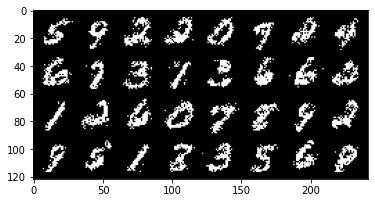

In [47]:
rbm = RBM(n_hin=40, k=5)

train_op = optim.SGD(rbm.parameters(),0.1)
for epoch in range(7):
    loss_ = []
    for _, (data,target) in enumerate(train_loader):
        data = np.array(data)
        data = np.where(data<0.3, 0, 1)
        


        data = torch.tensor(data)
        data = Variable(data.view(-1,784).float())
        

        sample_data = data.bernoulli()
        
        v,v1 = rbm(sample_data)
        loss = rbm.free_energy(v) - rbm.free_energy(v1)
        loss_.append(loss.item())
        train_op.zero_grad()
        loss.backward()
        train_op.step()
    
    print (np.mean(loss_))

    
show_adn_save("generate",make_grid(v1.view(32,1,28,28).data))

### 20% Pixels removed

156


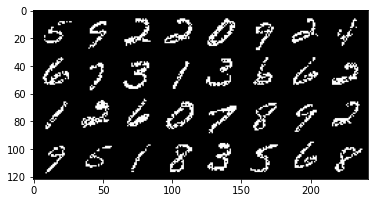

In [0]:
prob = 20

data = np.array(data)
# print (data.shape)
temp2 = np.copy(data)

#samples generator
count = int((784 * prob)/100)
print (count)

for t in range(0,32):
    positions = np.random.randint(0,784,count)
    for p in positions:
        # print (t,p)
        temp2[t,p] = 0

temp2 = torch.tensor(temp2)

show_adn_save("generate",make_grid(temp2.view(32,1,28,28).data))

### 50% Pixels removed

392


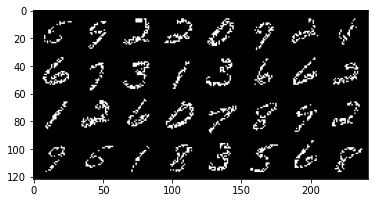

In [0]:
prob = 50

data = np.array(data)
temp2 = np.copy(data)

#samples generator
count = int((784 * prob)/100)
print (count)

for t in range(0,32):
    positions = np.random.randint(0,784,count)
    for p in positions:
        # print (t,p)
        temp2[t,p] = 0

temp2 = torch.tensor(temp2)

show_adn_save("generate",make_grid(temp2.view(32,1,28,28).data))

### 80% Pixels removed

627


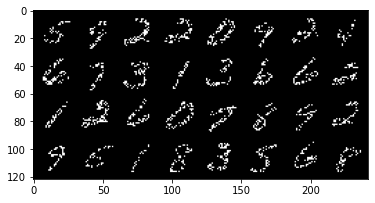

In [0]:
prob = 80

data = np.array(data)
temp2 = np.copy(data)

#samples generator
count = int((784 * prob)/100)
print (count)

for t in range(0,32):
    positions = np.random.randint(0,784,count)
    for p in positions:
        # print (t,p)
        temp2[t,p] = 0

temp2 = torch.tensor(temp2)

show_adn_save("generate",make_grid(temp2.view(32,1,28,28).data))

## Hidden Nodes = 100

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


-16.79959323411303
-12.735153247044284
-10.340282545923424
-9.141384328097931
-8.340650351062767
-7.686415617399887
-7.2345498741816865
-6.820745016720249
-6.2470673843741675
-5.740068220126349


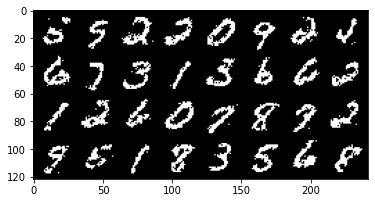

In [0]:
rbm = RBM(n_hin=100, k=5)

train_op = optim.SGD(rbm.parameters(),0.1)
for epoch in range(10):
    loss_ = []
    for _, (data,target) in enumerate(train_loader):
        data = np.array(data)
        data = np.where(data<0.3, 0, 1)
        


        data = torch.tensor(data)
        data = Variable(data.view(-1,784).float())
        

        sample_data = data.bernoulli()
        
        v,v1 = rbm(sample_data)
        loss = rbm.free_energy(v) - rbm.free_energy(v1)
        loss_.append(loss.item())
        train_op.zero_grad()
        loss.backward()
        train_op.step()
    
    print (np.mean(loss_))

    
show_adn_save("generate",make_grid(v1.view(32,1,28,28).data))

### Hidden = 100, 20 % Removed

156


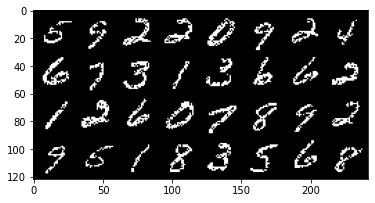

In [0]:
prob = 20

data = np.array(data)
temp2 = np.copy(data)

#samples generator
count = int((784 * prob)/100)
print (count)

for t in range(0,32):
    positions = np.random.randint(0,784,count)
    for p in positions:
        # print (t,p)
        temp2[t,p] = 0

temp2 = torch.tensor(temp2)

show_adn_save("generate",make_grid(temp2.view(32,1,28,28).data))

### Hidden = 100 and 50% Pixels removed

392


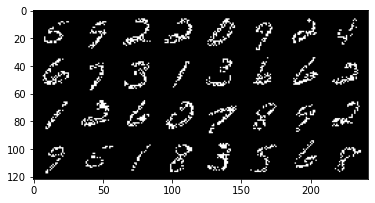

In [0]:
prob = 50

data = np.array(data)
temp2 = np.copy(data)

#samples generator
count = int((784 * prob)/100)
print (count)

for t in range(0,32):
    positions = np.random.randint(0,784,count)
    for p in positions:
        # print (t,p)
        temp2[t,p] = 0

temp2 = torch.tensor(temp2)

show_adn_save("generate",make_grid(temp2.view(32,1,28,28).data))

### Hidden = 100 and 80% Pixels removed

627


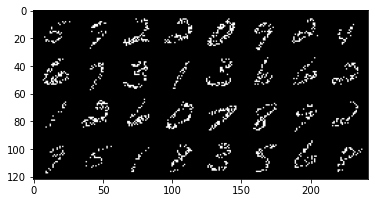

In [0]:
prob = 80

data = np.array(data)
temp2 = np.copy(data)

#samples generator
count = int((784 * prob)/100)
print (count)

for t in range(0,32):
    positions = np.random.randint(0,784,count)
    for p in positions:
        # print (t,p)
        temp2[t,p] = 0

temp2 = torch.tensor(temp2)

show_adn_save("generate",make_grid(temp2.view(32,1,28,28).data))

## Hidden = 500

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


-10.909974315781582
-10.167378700109941
-8.600591305730694
-7.443408112027752
-6.5361947586287314
-5.734211155092284
-5.082481856030951
-4.533669998396689
-4.0512124002615275
-3.7265043279001198


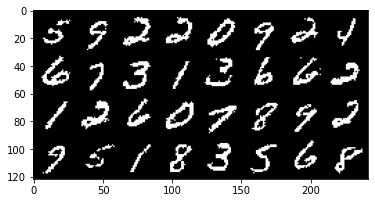

In [8]:
rbm = RBM(n_hin=500, k=1)

train_op = optim.SGD(rbm.parameters(),0.1)
for epoch in range(10):
    loss_ = []
    for _, (data,target) in enumerate(train_loader):
        data = np.array(data)
        data = np.where(data<0.3, 0, 1)
        


        data = torch.tensor(data)
        data = Variable(data.view(-1,784).float())
        

        sample_data = data.bernoulli()
        
        v,v1 = rbm(sample_data)
        loss = rbm.free_energy(v) - rbm.free_energy(v1)
        loss_.append(loss.item())
        train_op.zero_grad()
        loss.backward()
        train_op.step()
    
    print (np.mean(loss_))

    
show_adn_save("generate",make_grid(v1.view(32,1,28,28).data))

### Hidden = 500 and Prob = 20%

156


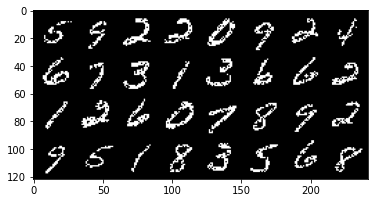

In [9]:
prob = 20

data = np.array(data)
temp2 = np.copy(data)

#samples generator
count = int((784 * prob)/100)
print (count)

for t in range(0,32):
    positions = np.random.randint(0,784,count)
    for p in positions:
        # print (t,p)
        temp2[t,p] = 0

temp2 = torch.tensor(temp2)

show_adn_save("generate",make_grid(temp2.view(32,1,28,28).data))

### Hidden = 500 and Prob = 50%

392


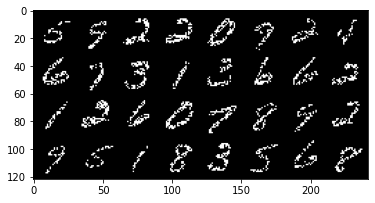

In [10]:
prob = 50

data = np.array(data)
temp2 = np.copy(data)

#samples generator
count = int((784 * prob)/100)
print (count)

for t in range(0,32):
    positions = np.random.randint(0,784,count)
    for p in positions:
        # print (t,p)
        temp2[t,p] = 0

temp2 = torch.tensor(temp2)

show_adn_save("generate",make_grid(temp2.view(32,1,28,28).data))

### Hidden = 500 and Prob = 80%

627


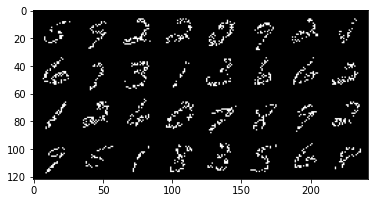

In [11]:
prob = 80

data = np.array(data)
temp2 = np.copy(data)

#samples generator
count = int((784 * prob)/100)
print (count)

for t in range(0,32):
    positions = np.random.randint(0,784,count)
    for p in positions:
        # print (t,p)
        temp2[t,p] = 0

temp2 = torch.tensor(temp2)

show_adn_save("generate",make_grid(temp2.view(32,1,28,28).data))

# Variational AutoEncoders

Reference (derivation) - https://lilianweng.github.io/lil-log/2018/08/12/from-autoencoder-to-beta-vae.html

Reference (Code) - https://vxlabs.com/2017/12/08/variational-autoencoder-in-pytorch-commented-and-annotated/

## Variational AutoEncoders - Derivation

$X$ = Input Data \\
$Z$ = Latent Data \\
$P(X)$ = Probability Distribution of Data \\
$P(X/Z)$ = Distribution to generate data from Latent Space \\

We Know $P(X) = \int P(X|Z)P(Z)dZ$ \\

We learn $P(Z|X)$ using a network $Q(Z|X)$, We need to $Q(Z|X)$ to be as close as possible to $P(Z|X)$ 

KL Divergence $(P(Z|X), Q(Z|X)$ should be minimum

\begin{align*}
D_{KL} [q(Z|X) || p(Z|X)] &= \sum_{z} q_{}(z|x) \log \frac{q_{}(z|x)}{p_{}(z|x)}\\
&= \mathbb{E} \left [\log \frac{q_{}(z|x)}{p_{}(z|x)}\right ] \\
&= \mathbb{E} \left [\log q_{}(z|x) - \log p_{}(z|x)\right ] \\
&= \mathbb{E} \left [\log q_{}(z|x) - \log \frac{p_{}(x|z)p_{}(z)}{p_{}(x)}\right ] \\
&= \mathbb{E} \left [\log q_{}(z|x) - \log p_{}(x|z) - \log p_{}(z) + \log p_{}(x)\right ] \\
&= \mathbb{E} \left [\log q_{}(z|x) - \log p_{}(x|z) - \log p_{}(z)\right ] + \log p_{}(x) \\
D_{KL} [q_{}(z|x) || p_{}(z|x)] - \log p_{}(x)&= \mathbb{E} \left [\log q_{\phi}(z|x) - \log p_{}(x|z) - \log p_{}(z)\right ]  \\
\log p_{}(x) - D_{KL} [q_{}(z|x) || p_{}(z|x)] &= \mathbb{E} \left [\log p_{}(x|z) + \log p_{}(z) - \log q_{}(z|x)  \right ]  \\
&= \mathbb{E} \left [\log p_{}(x|z) -(\log q_{}(z|x) - \log p_{}(z) )    \right ]  \\
&= \mathbb{E} \left [\log p_{}(x|z)  \right ] - \mathbb{E} \left [\log q_{}(z|x) - \log p_{}(z)    \right ]  \\
&= \mathbb{E} \left [\log p_{}(x|z)  \right ] -  D_{KL} [q_{}(z|x) || p_{}(z)] \\
\end{align*}
                            

$\mathbb{E} \left [\log p_{}(x|z)  \right ]$ -----> Reconstrunction Loss

$D_{KL} [q_{}(z|x) || p_{}(z)]$ -----> KL Divergence Loss
                           








In [0]:
import torch
import torch.nn as nn
import torch.tensor as tensor
from  torch.utils.data import DataLoader 
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.autograd import Variable
import torch.optim as optim

transform = transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                (0.1307,), (0.3081,) )])

In [0]:


BATCH_SIZE = 32
LOG_INTERVAL = 10
EPOCHS = 10
CUDA = True

ZDIMS = 2

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=BATCH_SIZE, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.ToTensor()),
    batch_size=BATCH_SIZE, shuffle=True)



In [0]:
class VAE(nn.Module):
    
    def __init__(self, bottle_neck):
        super(VAE,self).__init__()
        self.bn = bottle_neck

        self.encoder1 = nn.Linear(784, 256)

        self.mean = nn.Linear(256, self.bn)
        self.std = nn.Linear(256,self.bn)

        self.sampled = nn.Linear(self.bn, 256)
        self.decoder1 = nn.Linear(256,784)

    def encoder(self, inp):

        x = self.encoder1(inp.view(-1,784))
        x = torch.relu(x)
        mu = self.mean(x)
        sigma = self.std(x)
        
        return mu, sigma

    def decoder (self, latent):
        
        x = self.sampled(latent)
        x = torch.relu(x)
        x = self.decoder1(x)
        x = torch.sigmoid(x)
        return x


    def epsilon_trick(self, mean, std):
        std = std.mul(0.5).exp_()
        epsilon = Variable(std.data.new(std.size()).normal_())
        sample = epsilon.mul(std).add_(mean)
        return sample


    def forward(self, inp):
        mu, sigma = self.encoder(inp)
        latent = self.epsilon_trick(mu, sigma)
        out = self.decoder(latent)
        # print ("done")
        
        return out, mu, sigma
        


    def loss(self, out, inp, mean, std):

        recon_loss = torch.nn.functional.binary_cross_entropy(out, inp.view(-1,784))

        KL_div_loss = -0.5 * torch.sum(1 + std - mean.pow(2) - std.exp())
        KL_div_loss = (KL_div_loss)/(32*784)

        total_loss = recon_loss + KL_div_loss

        return total_loss


### VAE with 2 Nodes

In [0]:
model = VAE(2)
if CUDA:
    model.cuda()


def loss_function(recon_x, x, mu, logvar) -> Variable:
    recon_loss = torch.nn.functional.binary_cross_entropy(recon_x, x.view(-1, 784))
    KL_div = (-0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())) / (32*784)
    return recon_loss + KL_div


optimizer = optim.Adam(model.parameters(), lr=3e-3)


def train(epoch):
    
    model.train()
    train_loss = 0

    for batch_idx, (data, _) in enumerate(train_loader):
        data = Variable(data)
        data = data.cuda()
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()


    print('Episodic Loss : ', epoch, " - ", epoch, train_loss / len(train_loader.dataset))

for epoch in range(1, EPOCHS + 1):
    train(epoch)




Episodic Loss :  1  -  1 0.006787315462032954
Episodic Loss :  2  -  2 0.006408287801345189
Episodic Loss :  3  -  3 0.006305507473647594
Episodic Loss :  4  -  4 0.006238526110599439
Episodic Loss :  5  -  5 0.006193086227029562
Episodic Loss :  6  -  6 0.006160101660589377
Episodic Loss :  7  -  7 0.0061355996385216716
Episodic Loss :  8  -  8 0.006115001343935728
Episodic Loss :  9  -  9 0.00609803140660127
Episodic Loss :  10  -  10 0.006082402992248535


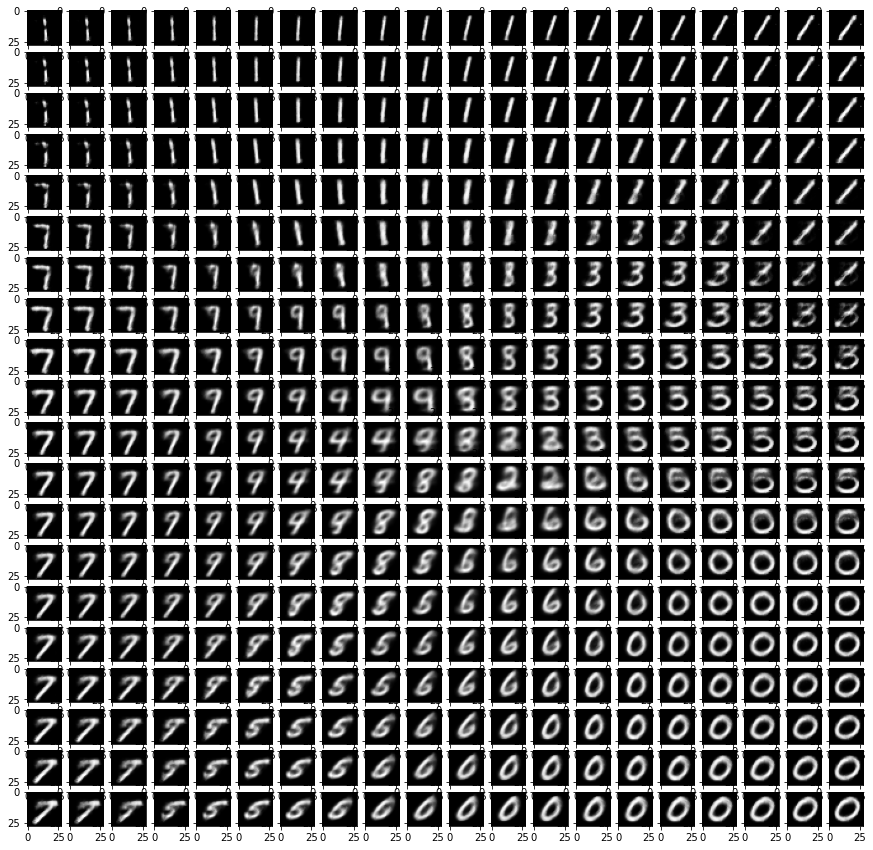

In [0]:
fig, axs = plt.subplots(20,20, figsize=(15,15))

i = -1
for x in np.arange(-3,3,0.3):
    i += 1    
    j = -1
    for y in np.arange(-3,3,0.3):
        j += 1
        point = tensor([x,y]).float()
        test = model.decoder(point.cuda()).view(28,28)
        # plt.imshow(test.cpu().detach())
        # plt.show()
        axs[i,j].imshow(test.cpu().detach(), cmap="gray")

fig.show()

### VAE with 8 Nodes

In [0]:
model = VAE(8)
if CUDA:
    model.cuda()


def loss_function(recon_x, x, mu, logvar) -> Variable:
    recon_loss = torch.nn.functional.binary_cross_entropy(recon_x, x.view(-1, 784))
    KL_div = (-0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())) / (32*784)
    return recon_loss + KL_div


optimizer = optim.Adam(model.parameters(), lr=3e-3)


def train(epoch):
    
    model.train()
    train_loss = 0

    for batch_idx, (data, _) in enumerate(train_loader):
        data = Variable(data)
        data = data.cuda()
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()


    print('Episodic Loss : ', epoch, " - ", epoch, train_loss / len(train_loader.dataset))

for epoch in range(1, EPOCHS + 1):
    train(epoch)




Episodic Loss :  1  -  1 0.005367765424400568
Episodic Loss :  2  -  2 0.00485697659527262
Episodic Loss :  3  -  3 0.004760443159689506
Episodic Loss :  4  -  4 0.004703864188989004
Episodic Loss :  5  -  5 0.004667678438251217
Episodic Loss :  6  -  6 0.004639084309215347
Episodic Loss :  7  -  7 0.0046188299287110565
Episodic Loss :  8  -  8 0.004601223851988713
Episodic Loss :  9  -  9 0.004586535422255595
Episodic Loss :  10  -  10 0.004575928862020373


### VAE with 16 Nodes

In [0]:
model = VAE(16)
if CUDA:
    model.cuda()


def loss_function(recon_x, x, mu, logvar) -> Variable:
    recon_loss = torch.nn.functional.binary_cross_entropy(recon_x, x.view(-1, 784))
    KL_div = (-0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())) / (32*784)
    return recon_loss + KL_div


optimizer = optim.Adam(model.parameters(), lr=3e-3)


def train(epoch):
    
    model.train()
    train_loss = 0

    for batch_idx, (data, _) in enumerate(train_loader):
        data = Variable(data)
        data = data.cuda()
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()


    print('Episodic Loss : ', epoch, " - ", epoch, train_loss / len(train_loader.dataset))

for epoch in range(1, EPOCHS + 1):
    train(epoch)




Episodic Loss :  1  -  1 0.005227062454074621
Episodic Loss :  2  -  2 0.004584636776770155
Episodic Loss :  3  -  3 0.004493431242927909
Episodic Loss :  4  -  4 0.004449655478323499
Episodic Loss :  5  -  5 0.004416400500883658
Episodic Loss :  6  -  6 0.004393303504462044
Episodic Loss :  7  -  7 0.0043758912985523545
Episodic Loss :  8  -  8 0.0043632501943657795
Episodic Loss :  9  -  9 0.0043550453301519155
Episodic Loss :  10  -  10 0.004343889902159572


# Question 3 - Deconv VAE

In [0]:
import torch
import torch.nn as nn
import torch.tensor as tensor
from  torch.utils.data import DataLoader 
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.autograd import Variable
import torch.optim as optim

transform = transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                (0.1307,), (0.3081,) )])

In [0]:


BATCH_SIZE = 32
LOG_INTERVAL = 10
EPOCHS = 10
CUDA = True

ZDIMS = 2

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=BATCH_SIZE, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.ToTensor()),
    batch_size=BATCH_SIZE, shuffle=True)



In [0]:
class VAE(nn.Module):
    
    def __init__(self, bottle_neck):
        super(VAE,self).__init__()
        self.bn = bottle_neck

        self.conv1 = nn.Conv2d(1,10, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(10,5, kernel_size=3, padding=1)

        self.deconv1 = nn.ConvTranspose2d(5,10, kernel_size=3, padding=1)
        self.deconv2 = nn.ConvTranspose2d(10,1, kernel_size=3, padding=1)

        # self.encoder1 = nn.Linear(1000, 512)
        self.encoder1 = nn.Linear(3920,256)
        self.mean = nn.Linear(256, self.bn)
        self.std = nn.Linear(256,self.bn)

        self.sampled = nn.Linear(self.bn, 256)
        self.decoder1 = nn.Linear(256,3920)
        # self.decoder2 = nn.Linear(512, 100)

        # self.maxpool = nn.MaxPool2d(2)
        # self.upsample = nn.MaxUnpool2d(2)

    def encoder(self, inp):

        x = self.conv1(inp)
        # x = self.maxpool(x)
        x = self.conv2(x)
        x = self.encoder1(x.view(32,-1))
        x = torch.relu(x)
        mu = self.mean(x)
        sigma = self.std(x)
        
        return mu, sigma

    def decoder (self, latent):
        
        x = self.sampled(latent)
        x = torch.relu(x)
        x = self.decoder1(x)

        # x = self.upsample(2)
        x = self.deconv1(x.view(-1,5,28,28))
        # print (x.shape)
        # x = self.upsample(x)
        x = self.deconv2(x)


        return x.view(-1,784)


    def epsilon_trick(self, mean, std):
        std = std.mul(0.5).exp_()
        epsilon = Variable(std.data.new(std.size()).normal_())
        sample = epsilon.mul(std).add_(mean)
        return sample


    def forward(self, inp):
    
        mu, sigma = self.encoder(inp)
        latent = self.epsilon_trick(mu, sigma)
        out = self.decoder(latent)
        # print (latent.shape)
        # print ("done")
        
        return out, mu, sigma
        


    def loss(self, out, inp, mean, std):

        recon_loss = torch.nn.functional.binary_cross_entropy(out, inp.view(-1,784))

        KL_div_loss = -0.5 * torch.sum(1 + std - mean.pow(2) - std.exp())
        KL_div_loss = (KL_div_loss)/(32*784)

        total_loss = recon_loss + KL_div_loss

        return total_loss


In [0]:
model = VAE(2)
if CUDA:
    model.cuda()


def loss_function(recon_x, x, mu, logvar) -> Variable:
    recon_loss = torch.nn.functional.binary_cross_entropy_with_logits(recon_x, x.view(-1, 784))
    KL_div = (-0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())) / (32*784)
    # print(recon_loss, KL_div)
    return recon_loss + KL_div


optimizer = optim.Adam(model.parameters(), lr=0.003)


for epoch in range(1, EPOCHS + 1):
    
    model.train()
    train_loss = 0

    for batch_idx, (data, _) in enumerate(train_loader):
        data = Variable(data)
        data = data.cuda()
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()


    print('Episodic Loss : ', epoch, " - ", epoch, train_loss / len(train_loader.dataset))





Episodic Loss :  1  -  1 0.006623124386866888
Episodic Loss :  2  -  2 0.0062976223021745685
Episodic Loss :  3  -  3 0.006198387951403856
Episodic Loss :  4  -  4 0.006141728263099988
Episodic Loss :  5  -  5 0.006105189313987891
Episodic Loss :  6  -  6 0.006078639920552572
Episodic Loss :  7  -  7 0.006055204973121484
Episodic Loss :  8  -  8 0.0060381853207945825
Episodic Loss :  9  -  9 0.006020040537168582
Episodic Loss :  10  -  10 0.0060080084008475145


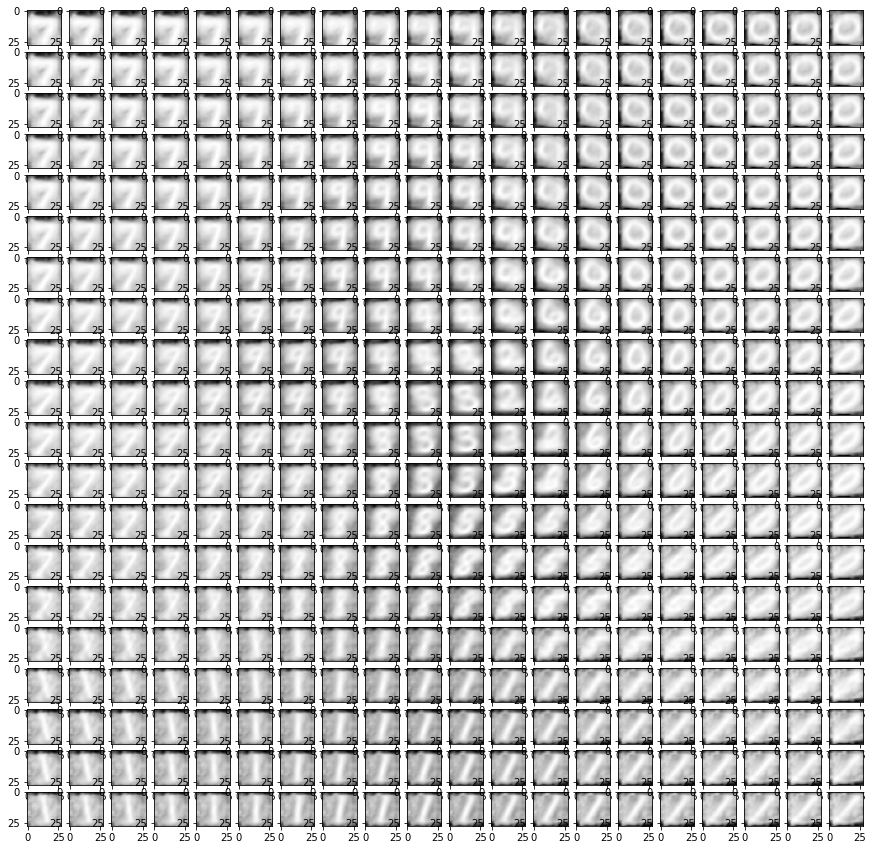

In [0]:
fig, axs = plt.subplots(20,20, figsize=(15,15))

i = -1
for x in np.arange(-3,3,0.3):
    i += 1    
    j = -1
    for y in np.arange(-3,3,0.3):
        j += 1
        point = tensor([x,y]).float()
        test = model.decoder(point.cuda()).view(28,28)
        # plt.imshow(test.cpu().detach())
        # plt.show()
        axs[i,j].imshow(test.cpu().detach(), cmap="gray")

fig.show()

# Question 4 - General Adversarial Networks

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from  torch import Tensor as tensor
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader
from torch.autograd import Variable

import numpy as np
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                (0.1307,), (0.3081,) )])

In [0]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.layer1 = nn.Linear(100,32)
        self.layer2 = nn.Linear(32, 64)
        self.layer3 = nn.Linear(64, 128)
        self.layer4 = nn.Linear(128, 784)
    
    def forward(self, inp):
        x = self.layer1(inp)
        x = torch.relu(x)
        x = self.layer2(x)
        x = torch.relu(x)
        x = self.layer3(x)
        x = torch.relu(x)
        x = self.layer4(x)

        return x
    

In [0]:
# torch.set_default_tensor_type('torch.cuda.FloatTensor')

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.layer1 = nn.Linear(784, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 1)

    def forward(self, inp):
        x = self.layer1(inp)
        x = torch.relu(x)
        x = self.layer2(x)
        x = torch.relu(x)
        x = self.layer3(x)
        x = torch.relu(x)
        x = self.layer4(x)
        return torch.sigmoid(x)
    

In [0]:
train_set = MNIST(".", download=True, transform=transform, train=True)
test_set = MNIST(".", download=True, transform=transform, train=False)

In [0]:
train_loader = DataLoader(train_set, batch_size=1, shuffle=False)
test_loader = DataLoader(test_set, batch_size=1, shuffle=False)

In [0]:
gen = Generator().cuda()
dis = Discriminator().cuda()

d_optim = optim.Adam(dis.parameters(), lr=1e-3)
g_optim = optim.Adam(gen.parameters(), lr=1e-3)

In [0]:
for epoch in range(0,5):
    g_t = 0
    d_t = 0   
    for batch_idx, (data, label) in enumerate(train_loader):
        
            # print ("Epoch -", epoch, "Item : ", batch_idx, )
        data = data.cuda()
        original = data.view(1,784)
        random_noise = Variable(torch.randn(1,100))
        fake_img = gen(random_noise.cuda())

        d_real_prob = dis(original)
        d_fake_prob = dis(fake_img)
    

        d_real_loss = nn.functional.binary_cross_entropy(d_real_prob[0], torch.tensor([1]).float())
        d_fake_loss = nn.functional.binary_cross_entropy(d_fake_prob[0], torch.tensor([0]).float())
        total_disc_loss = d_real_loss + d_fake_loss
        

        d_optim.zero_grad()
        total_disc_loss.backward()
        d_optim.step()
        
        original = data.view(1,784)
        random_noise = Variable(torch.randn(1,100))
        fake_img = gen(random_noise)
        d_real_prob = dis(original)
        d_fake_prob = dis(fake_img)

        
        g_real_loss = nn.functional.binary_cross_entropy(d_real_prob[0], torch.tensor([0]).float())
        g_fake_loss = nn.functional.binary_cross_entropy(d_fake_prob[0], torch.tensor([1]).float())
        total_gen_loss = g_real_loss + g_fake_loss

        g_optim.zero_grad()
        total_gen_loss.backward()
        g_optim.step()

        g_t += total_gen_loss.item()
        d_t += total_disc_loss.item()
        if batch_idx % 100 == 0:
            print ("Losses - gen and dis",total_gen_loss.item(), total_disc_loss.item())







Losses - gen and dis 1.4634989500045776 1.396871566772461
Losses - gen and dis 5.325145244598389 0.29446840286254883
Losses - gen and dis 4.330903053283691 0.4858477711677551
Losses - gen and dis 2.501986265182495 1.9858180284500122
Losses - gen and dis 3.7799057960510254 0.34494221210479736
Losses - gen and dis 8.118894577026367 0.11602532863616943
Losses - gen and dis 7.3057098388671875 0.36962637305259705
Losses - gen and dis 3.917316198348999 3.3735122680664062
Losses - gen and dis 5.54785680770874 0.4546360671520233
Losses - gen and dis 8.935396194458008 0.34524741768836975
Losses - gen and dis 5.012277603149414 0.20848073065280914
Losses - gen and dis 15.33122730255127 0.20496080815792084
Losses - gen and dis 8.81404972076416 0.13106001913547516
Losses - gen and dis 2.3988139629364014 1.3435633182525635
Losses - gen and dis 17.744815826416016 0.256693035364151
Losses - gen and dis 1.6479191780090332 1.6903448104858398
Losses - gen and dis 9.453551292419434 0.04491112008690834
Los